# Testability Project

Group 5:
- Vibhu Behl - V00913786
- Matthew McLean - V00906842
- Harry Lam - V00939194
- Zhaoqing Ji - V00942106
- Kester Yang - V00866313

## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

C:\Users\klies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data = pd.read_csv("./dataset/researchDataset/DS07012.csv")

# Data Visualization

In [3]:
# data.hist(bins="auto", figsize=(12,8))
# plt.show()

# # Bar chart of the value_counts distribution on "Class"
# class_counts = data["Class"].value_counts()
# class_counts.plot(kind="bar")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.title("Bar Chart of Class")
# plt.show()

In [4]:
# # Violin plot for "Class" and "PK_CountLineCode"
# plt.figure(figsize=(10, 6))
# sns.violinplot(x="Class", y="PK_CountLineCode", data=data)
# plt.title("Violin plot of PK_CountLineCode across different Classes")
# plt.show()

# # Violin plot for "Class" and "PK_AvgLineCode"
# plt.figure(figsize=(10, 6))
# sns.violinplot(x="Class", y="PK_AvgLineCode", data=data)
# plt.title("Violin plot of PK_AvgLineCode across different Classes")
# plt.show()

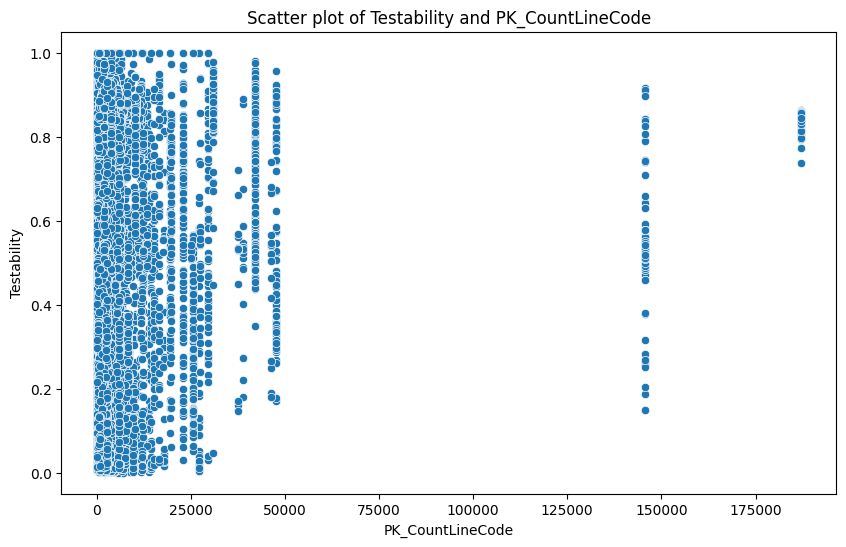

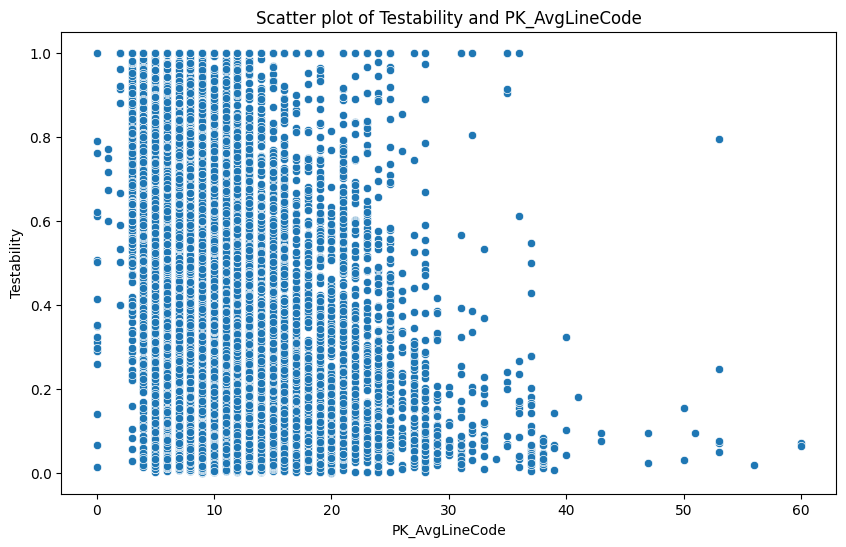

In [5]:
# Scatter plot for "Testability" and "PK_CountLineCode"
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PK_CountLineCode", y="Testability", data=data)
plt.title("Scatter plot of Testability and PK_CountLineCode")
plt.show()

# Scatter plot for "Testability" and "PK_AvgLineCode"
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PK_AvgLineCode", y="Testability", data=data)
plt.title("Scatter plot of Testability and PK_AvgLineCode")
plt.show()

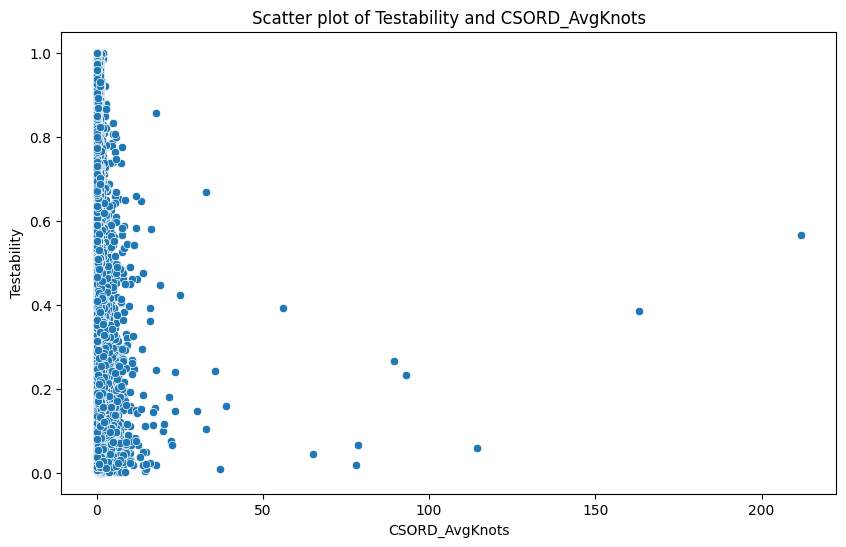

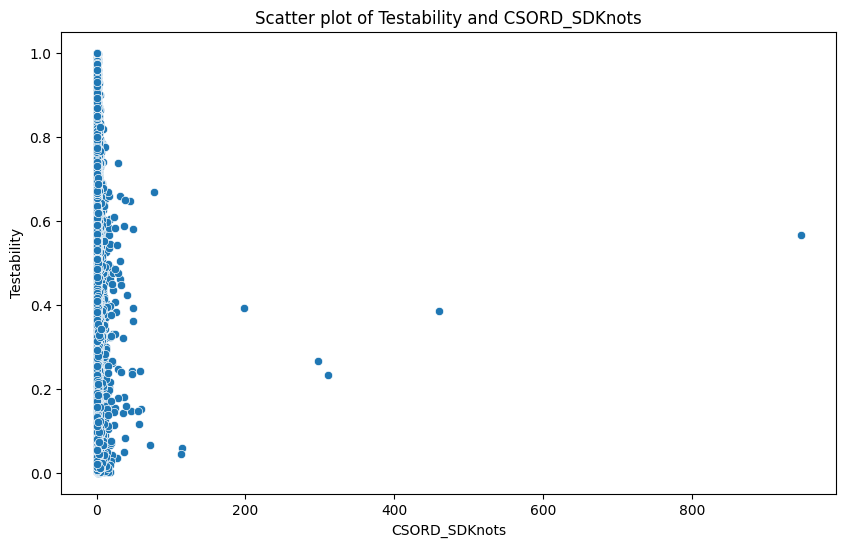

In [6]:
# Scatter plot for "Testability" and "CSORD_AvgKnots"
plt.figure(figsize=(10, 6))
sns.scatterplot(x="CSORD_AvgKnots", y="Testability", data=data)
plt.title("Scatter plot of Testability and CSORD_AvgKnots")
plt.show()

# Scatter plot for "Testability" and "CSORD_SDKnots"
plt.figure(figsize=(10, 6))
sns.scatterplot(x="CSORD_SDKnots", y="Testability", data=data)
plt.title("Scatter plot of Testability and CSORD_SDKnots")
plt.show()

# Data Preprocessing

In [7]:
data.head()

,Class,PK_CountLineCode,PK_CountLineCodeDecl,PK_CountLineCodeExe,PK_AvgLineCode,PK_AvgLineCodeDecl,PK_AvgLineCodeExe,PK_MaxLineCode,PK_MaxLineCodeDecl,PK_MaxLineCodeExe,...,CSORD_SumKnots,CSORD_MinKnots,CSORD_MaxKnots,CSORD_AvgKnots,CSORD_SDKnots,CSORD_NumberOfClassConstructors,CSORD_NumberOfDepends,CSORD_NumberOfDependsBy,CSORD_NumberOfMethods,Testability
0,CharacterEventSet,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0.000000,0.00000,0,5,1,1,0.349560
1,CrossEntropyDriver,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0.000000,0.00000,0,3,1,1,0.312267
2,Document,0,0,0,0,0.0,0.0,0,0,0,...,1,0,1,0.090909,0.28748,2,0,6,11,0.790031
3,Event,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0.000000,0.00000,3,0,4,8,0.761905
4,EventSet,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0.000000,0.00000,2,1,10,8,0.611840


In [8]:
data.describe()

,PK_CountLineCode,PK_CountLineCodeDecl,PK_CountLineCodeExe,PK_AvgLineCode,PK_AvgLineCodeDecl,PK_AvgLineCodeExe,PK_MaxLineCode,PK_MaxLineCodeDecl,PK_MaxLineCodeExe,PK_MinLineCode,...,CSORD_SumKnots,CSORD_MinKnots,CSORD_MaxKnots,CSORD_AvgKnots,CSORD_SDKnots,CSORD_NumberOfClassConstructors,CSORD_NumberOfDepends,CSORD_NumberOfDependsBy,CSORD_NumberOfMethods,Testability
count,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,...,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000,16165.000000
mean,5927.955769,2491.007980,2725.618744,9.974698,44.450428,75.714427,658.053263,191.345128,420.997897,20.671574,...,7.387133,0.131704,3.947417,0.778937,1.126714,0.946861,7.960656,4.348469,13.829508,0.503820
std,17867.527046,8940.331166,7338.021982,5.848785,69.059734,88.623291,1088.659983,290.844029,760.404197,54.118239,...,46.617108,0.990446,41.230034,3.137093,9.517925,1.115551,15.080525,14.090000,29.520494,0.296545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000667
25%,494.000000,196.000000,218.000000,6.000000,16.451613,24.588235,136.000000,40.000000,77.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,0.256002
50%,1467.000000,533.000000,706.000000,9.000000,27.500000,48.222222,323.000000,90.000000,189.000000,6.000000,...,1.000000,0.000000,1.000000,0.250000,0.400000,1.000000,5.000000,1.000000,6.000000,0.509804
75%,3947.000000,1425.000000,1994.000000,13.000000,49.585366,99.363636,722.000000,209.000000,420.000000,17.000000,...,6.000000,0.000000,3.000000,0.900000,1.049781,1.000000,9.000000,4.000000,14.000000,0.743733
max,187089.000000,108516.000000,77475.000000,60.000000,858.417476,1727.000000,15213.000000,3073.000000,10684.000000,2612.000000,...,4449.000000,78.000000,4443.000000,211.857143,946.112612,13.000000,196.000000,540.000000,381.000000,1.000000


In [9]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(f"Column: {column}")
        print()

Column: Class



Are there any Null or Nan

In [10]:
data.isna().sum().sum()

0

In [11]:
data.isnull().sum().sum()

0

It can be observed that we do not have any missing values or categorical values in our dataset, all features are numeric

### Min Max Scaling and cleaning

In [12]:
df = data.copy()
label = df["Testability"]
df.drop('Class', axis=1, inplace=True)
df.drop('Testability', axis=1, inplace=True)
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)
df = pd.DataFrame(df)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.025510,0.001852,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.015306,0.001852,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000225,0.0,0.000225,0.000429,0.000304,0.153846,0.000000,0.011111,0.026316
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.230769,0.000000,0.007407,0.018421
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.153846,0.005102,0.018519,0.018421


### Train-test split

In [14]:
(X_train, X_test, y_train, y_test) = train_test_split(df, label, random_state=100)

### SVR Models

In [15]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)
# make prediction for test data
y_pred = model.predict(X_test)
# evaluate performance
print('RMSE:',mean_squared_error(y_test, y_pred, squared = False))
print('MAE:',mean_absolute_error(y_test, y_pred))

RMSE: 0.19619663275789173
MAE: 0.15241238358871997


In [16]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
# make prediction for test data
y_pred = model.predict(X_test)
# evaluate performance
print('RMSE:',mean_squared_error(y_test, y_pred, squared = False))
print('MAE:',mean_absolute_error(y_test, y_pred))

RMSE: 0.17992846985881933
MAE: 0.1347733983764083


In [17]:
model = SVR(kernel='poly')
model.fit(X_train, y_train)
# make prediction for test data
y_pred = model.predict(X_test)
# evaluate performance
print('RMSE:',mean_squared_error(y_test, y_pred, squared = False))
print('MAE:',mean_absolute_error(y_test, y_pred))

RMSE: 0.19884819257152556
MAE: 0.1499543582360534


In [18]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Decision Tree Model:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))

Decision Tree Model:
RMSE: 0.24776700072945476
MAE: 0.1652189943775275


In [19]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Regressor Model:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))

Random Forest Regressor Model:
RMSE: 0.1683806475766138
MAE: 0.11961468621522157


In [21]:
model = HistGradientBoostingRegressor(max_bins=255)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Histogram-Based Gradient Boosting Regressor Model:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))

Histogram-Based Gradient Boosting Regressor Model:
RMSE: 0.1668337867650396
MAE: 0.11990574656989532


In [22]:
model = MLPRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Multi-Layer Perceptron Regressor Model:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))

Multi-Layer Perceptron Regressor Model:
RMSE: 0.19241368386749108
MAE: 0.14370268944231765


In [ ]:
base_regressors = [
    ('svr', SVR()),
    ('hist_gradient', HistGradientBoostingRegressor()),
    ('mlp', MLPRegressor()),
    ('decision_tree', DecisionTreeRegressor())
]
hyperparameters = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'hist_gradient__max_bins': [255, 512],
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'decision_tree__max_depth': [None, 5, 10]
}
grid_search = GridSearchCV(
    estimator=VotingRegressor(base_regressors),
    param_grid=hyperparameters,
    scoring='neg_mean_squared_error',
    cv=5
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('Voting Regressor Model:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))